In [ ]:
import torch
import numpy as np
import torch.nn as nn
from torch.optim import Adam
import matplotlib.pyplot as plt
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from mpl_toolkits.axes_grid1 import ImageGrid
from torchvision.utils import save_image, make_grid
from sklearn.model_selection import train_test_split

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

100%|██████████| 170498071/170498071 [00:10<00:00, 15868902.42it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


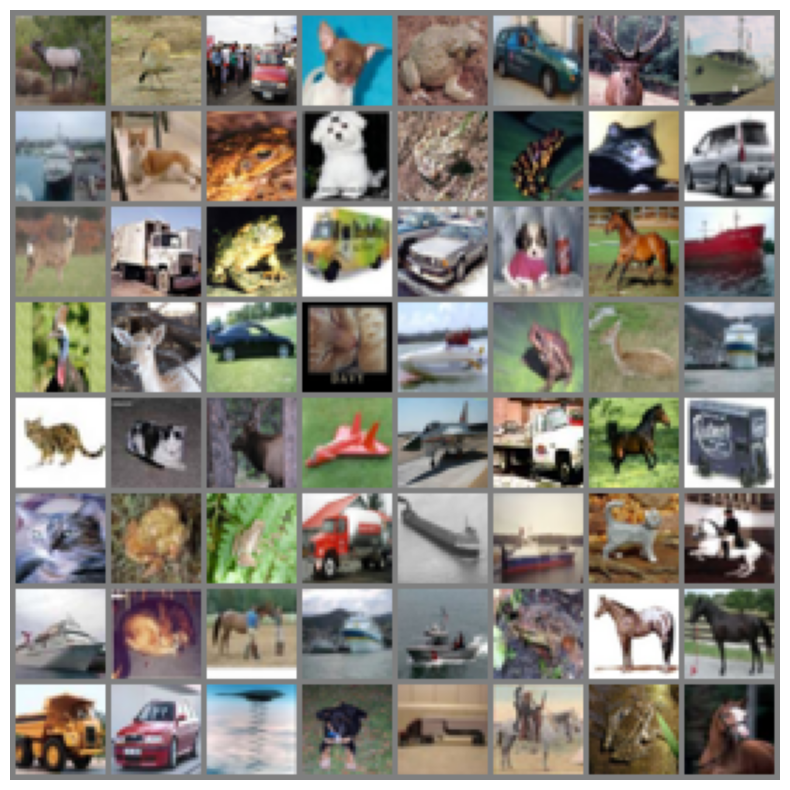

In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
fig = plt.figure(figsize=(10, 10))
imshow(make_grid(images))
plt.show()

In [ ]:
class Encoder(nn.Module):
    def __init__(self, latent_dim):
        super(Encoder, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(64*4*4, latent_dim),
        )

    def forward(self, x):
        return self.conv(x)

class Decoder(nn.Module):
    def __init__(self, latent_dim):
        super(Decoder, self).__init__()
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64*4*4),
            nn.ReLU(),
            nn.Unflatten(1, (64, 4, 4)),
            nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, 3, stride=2, padding=1, output_padding=1),
            nn.Tanh(),
        )

    def forward(self, x):
        return self.decoder(x)

class Autoencoder(nn.Module):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder(latent_dim)
        self.decoder = Decoder(latent_dim)

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [ ]:
def test_autoencoder(model, data_loader):
    model.eval()  # Set the model to evaluation mode
    total_loss = 0
    criterion = nn.MSELoss()
    with torch.no_grad():  # No need to track gradients for testing
        for data in data_loader:
            inputs, _ = data
            inputs = inputs.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, inputs)
            total_loss += loss.item()
    avg_loss = total_loss / len(data_loader)
    return avg_loss

In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

def visualize_reconstruction(model, data_loader):
    model.eval()
    dataiter = iter(data_loader)
    images, _ = next(dataiter)
    images = images.to(device)
    outputs = model(images)

    plt.figure(figsize=(10, 4))
    # Display original images
    plt.subplot(1, 2, 1)
    imshow(make_grid(images.cpu()[:4]))
    plt.title('Original Images')

    # Display reconstructed images
    plt.subplot(1, 2, 2)
    imshow(make_grid(outputs.cpu()[:4]))
    plt.title('Reconstructed Images')
    plt.show()

Training with latent dimension: 32
Epoch 1/10, Loss: 0.0833
Epoch 2/10, Loss: 0.0522
Epoch 3/10, Loss: 0.0505
Epoch 4/10, Loss: 0.0499
Epoch 5/10, Loss: 0.0495
Epoch 6/10, Loss: 0.0492
Epoch 7/10, Loss: 0.0489
Epoch 8/10, Loss: 0.0487
Epoch 9/10, Loss: 0.0485
Epoch 10/10, Loss: 0.0484
Testing completed for latent dimension 32, Test Loss: 0.0486



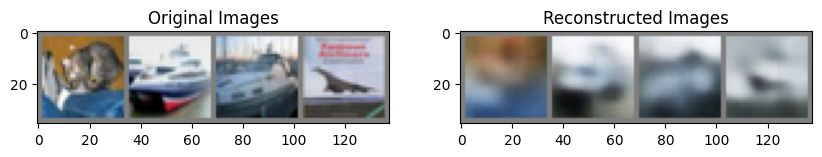

Training with latent dimension: 64
Epoch 1/10, Loss: 0.0747
Epoch 2/10, Loss: 0.0406
Epoch 3/10, Loss: 0.0355
Epoch 4/10, Loss: 0.0340
Epoch 5/10, Loss: 0.0334
Epoch 6/10, Loss: 0.0331
Epoch 7/10, Loss: 0.0329
Epoch 8/10, Loss: 0.0328
Epoch 9/10, Loss: 0.0327
Epoch 10/10, Loss: 0.0325
Testing completed for latent dimension 64, Test Loss: 0.0326



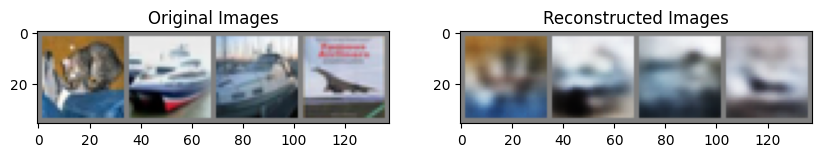

Training with latent dimension: 128
Epoch 1/10, Loss: 0.0767
Epoch 2/10, Loss: 0.0358
Epoch 3/10, Loss: 0.0284
Epoch 4/10, Loss: 0.0249
Epoch 5/10, Loss: 0.0230
Epoch 6/10, Loss: 0.0219
Epoch 7/10, Loss: 0.0212
Epoch 8/10, Loss: 0.0209
Epoch 9/10, Loss: 0.0206
Epoch 10/10, Loss: 0.0204
Testing completed for latent dimension 128, Test Loss: 0.0203



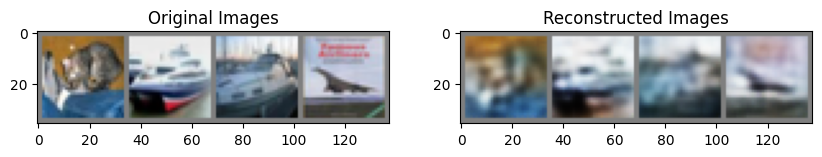

Training with latent dimension: 256
Epoch 1/10, Loss: 0.0741
Epoch 2/10, Loss: 0.0338
Epoch 3/10, Loss: 0.0264
Epoch 4/10, Loss: 0.0218
Epoch 5/10, Loss: 0.0195
Epoch 6/10, Loss: 0.0179
Epoch 7/10, Loss: 0.0166
Epoch 8/10, Loss: 0.0158
Epoch 9/10, Loss: 0.0150
Epoch 10/10, Loss: 0.0144
Testing completed for latent dimension 256, Test Loss: 0.0147



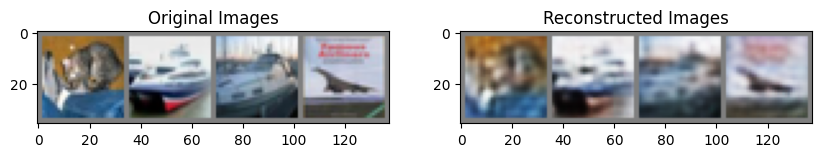

In [ ]:
def train_and_test_autoencoder(latent_dims, num_epochs=10):
    for latent_dim in latent_dims:
        autoencoder = Autoencoder(latent_dim).to(device)
        optimizer = Adam(autoencoder.parameters(), lr=0.001)
        criterion = nn.MSELoss()

        print(f"Training with latent dimension: {latent_dim}")
        for epoch in range(num_epochs):
            autoencoder.train()  # Set the model to training mode
            total_loss = 0
            for data in trainloader:
                inputs, _ = data
                inputs = inputs.to(device)
                optimizer.zero_grad()
                outputs = autoencoder(inputs)
                loss = criterion(outputs, inputs)
                loss.backward()
                optimizer.step()
                total_loss += loss.item()
            avg_loss = total_loss / len(trainloader)
            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}')

        # Testing phase
        test_loss = test_autoencoder(autoencoder, testloader)
        print(f"Testing completed for latent dimension {latent_dim}, Test Loss: {test_loss:.4f}\n")

        # Visualize reconstruction results
        visualize_reconstruction(autoencoder, testloader)

# Example usage
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_and_test_autoencoder([32, 64, 128, 256])